# Laptop Price prediction

# Import package

In [121]:
# mengolah data
import pandas as pd
import numpy as np

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [122]:
df = pd.read_csv('laptops.csv' ,encoding='latin-1',index_col=["Unnamed: 0"])
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [123]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


# Cek missing value

In [125]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [126]:
df.drop(columns=["Product"], inplace=True)

# Feature extraction

In [132]:
# Remove GB dan KG pd kolom ram dan weight
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

# convert type data column ram dan weight
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")


In [133]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [134]:
# kolom baru dengan informasi touchscreen
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x:1 if "Touchscreen"in x else 0)
df


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0
1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0


In [135]:
# Kolom baru dengan informasi layar Ips
df["Ips"] = df["ScreenResolution"].apply(lambda x:1 if "IPS"in x else 0)
df


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0
1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0


In [136]:
# kolom baru menampilkan screen resolution vertikal dan horizontal
new = df["ScreenResolution"].str.split("x", n=1, expand=True)
df["X_res"] = new[0]
df["Y_res"] = new[1]

In [137]:
# membersihkan data kolom x res
df["X_res"] = df["X_res"].str.replace('','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])

In [138]:
df["X_res"].value_counts()


1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2256      6
2304      6
2400      4
2880      4
1440      4
2160      2
2736      1
Name: X_res, dtype: int64

In [139]:

df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")


In [140]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1920,1080
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,3200,1800
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768
1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768


In [141]:
# membuat variabel ppi (pixel per inch)
df["ppi"] = (((df["X_res"]**2) + (df["Y_res"]**2)) ** 0.5/df["Inches"]).astype("float")
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,ppi
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1920,1080,157.350512
1317,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,3200,1800,276.053530
1318,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768,111.935204
1319,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768,100.454670


In [142]:
# menghapus kolom screen resolution
df.drop(columns=["ScreenResolution", "Inches", "X_res", "Y_res"], inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi
1,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
2,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
3,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
4,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
5,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [143]:

# menambah kolom baru dnegan nama CPU name
df["Cpu Name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [144]:
# memilah jenis procesor laptop
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [145]:
df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
1,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
2,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
3,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
4,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
5,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,157.350512,Intel Core i7,Intel Core i7
1317,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,276.053530,Intel Core i7,Intel Core i7
1318,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1319,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,Intel Core i7


In [146]:
df.drop(columns=["Cpu", "Cpu Name"], inplace=True)
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand
1,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
2,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
3,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
4,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
5,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,157.350512,Intel Core i7
1317,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,276.053530,Intel Core i7
1318,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Other Intel Processor
1319,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7


In [147]:

# Memilah jenis memory laptop
df["Memory"] = df["Memory"].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()

df["second"] = new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)


df["first"] = df["first"].str.replace(r'\D', '')

df["second"].fillna("0", inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)


df["second"] = df["second"].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer2HDD', 'Layer2SSD', "Memory"], inplace=True)


In [148]:

df["Gpu Brand"] = df["Gpu"].apply(lambda x:x.split()[0])



In [149]:
df.drop(columns=["Gpu"], inplace=True)

In [150]:
# memilah jenis operation system
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 s":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return "Others/no Os/Linux"
    
df["os"] = df["OpSys"].apply(cat_os)

In [151]:
df.drop(columns=["OpSys"], inplace=True)

In [152]:
df

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
1,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
2,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
3,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/no Os/Linux
4,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
5,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1317,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1318,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1319,HP,Notebook,6,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


# Exploratory Data Analysis

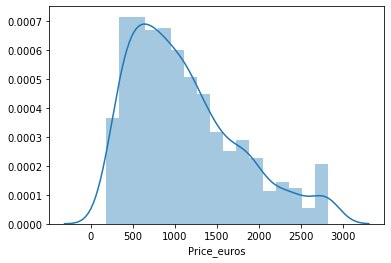

In [153]:
# Analisis kolom price
sns.distplot(df['Price_euros']);

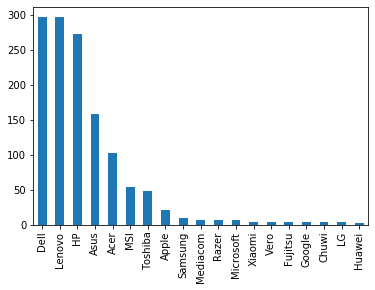

In [154]:
# Company analysis
df["Company"].value_counts().plot(kind="bar");

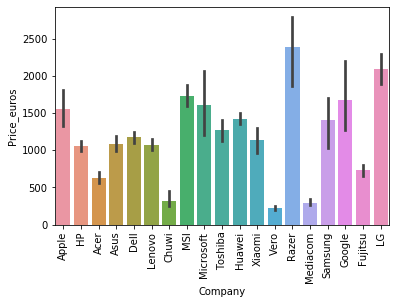

In [155]:
# average price value of each brands
sns.barplot(x=df["Company"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

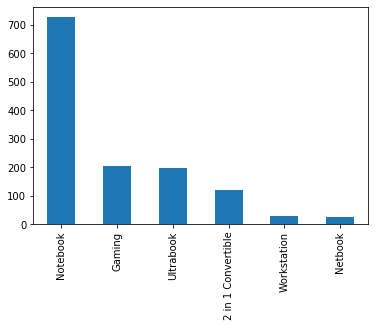

In [156]:
df["TypeName"].value_counts().plot(kind="bar"); 

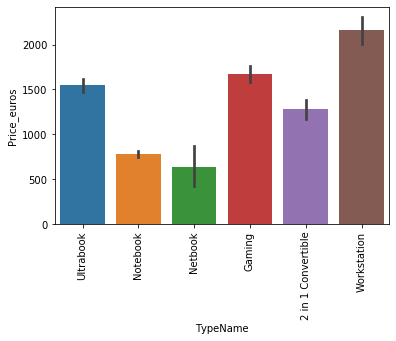

In [157]:
sns.barplot(x=df["TypeName"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

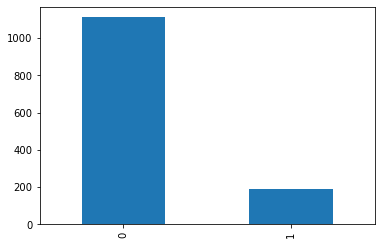

In [158]:
df["Touchscreen"].value_counts().plot(kind="bar");

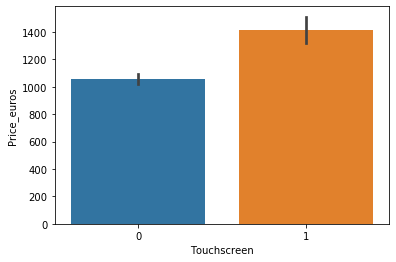

In [159]:
sns.barplot(x=df["Touchscreen"], y=df["Price_euros"]);

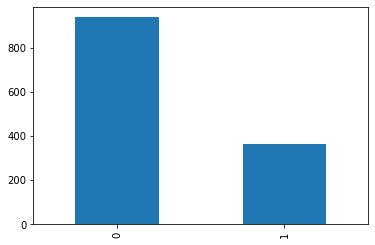

In [160]:
df["Ips"].value_counts().plot(kind="bar");

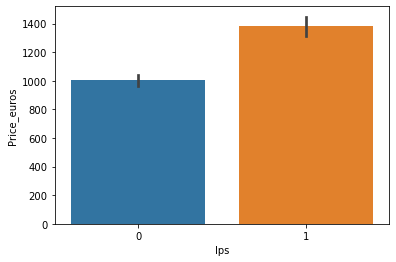

In [161]:
sns.barplot(x=df["Ips"], y=df["Price_euros"]);


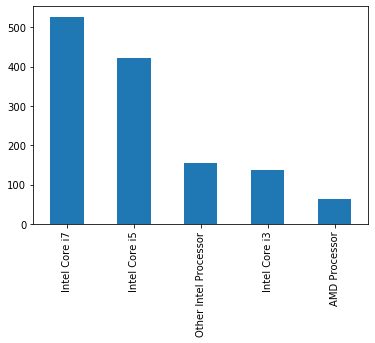

In [162]:
df["Cpu brand"].value_counts().plot(kind="bar");

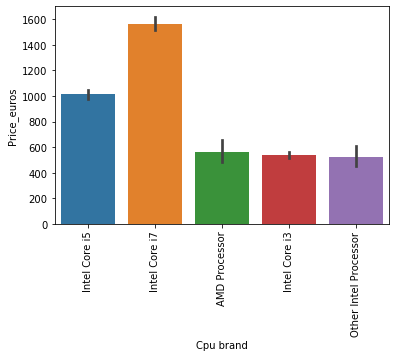

In [163]:
sns.barplot(x=df["Cpu brand"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

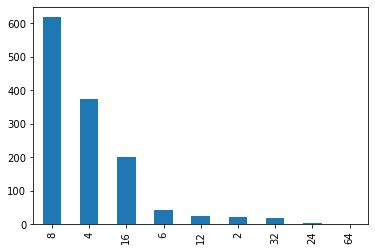

In [164]:
df["Ram"].value_counts().plot(kind="bar");

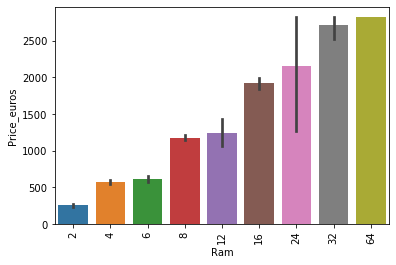

In [165]:
sns.barplot(x=df["Ram"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

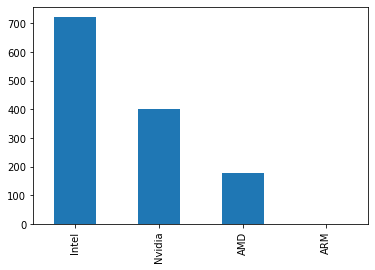

In [166]:
df["Gpu Brand"].value_counts().plot(kind="bar")

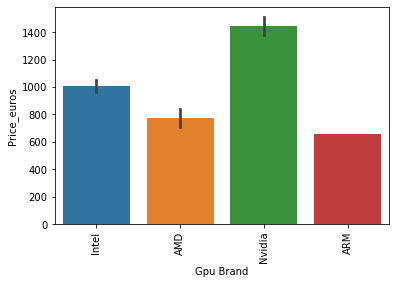

In [167]:
sns.barplot(x=df["Gpu Brand"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

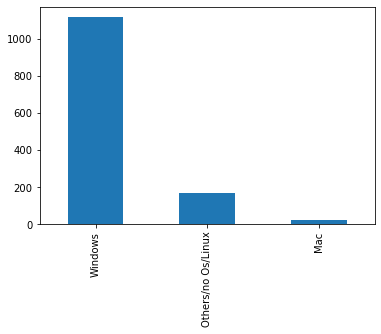

In [168]:
df["os"].value_counts().plot(kind="bar");

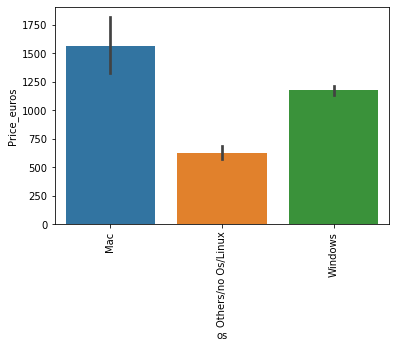

In [169]:
sns.barplot(x=df["os"], y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show();

In [170]:
# korelasi setelahb data dibersihkan / dirapihkan thd harga laptop
df.corr()["Price_euros"]

Ram            0.717150
Weight         0.181769
Price_euros    1.000000
Touchscreen    0.196009
Ips            0.262653
ppi            0.482624
HDD           -0.096791
SSD            0.666653
Name: Price_euros, dtype: float64

In [171]:
from jcopml.plot import plot_correlation_matrix

In [172]:
plot_correlation_matrix(df, target_col="Price_euros")

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

# Modelling

In [173]:
X = df.drop(columns=["Price_euros"])
y = df.Price_euros

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1042, 12), (261, 12), (1042,), (261,))

In [174]:
numerical_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(1))
])

categoriqal_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown = 'ignore')),
    ("poly", PolynomialFeatures(1))
    
])

In [175]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ['Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD']),
    ("categoric", categoriqal_pipeline, ['Company', 'TypeName', 'Cpu brand', 'os', 'Gpu Brand'])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", LinearRegression())
])

parameter = {
        'algo__fit_intercept': [True, False],
}
    


In [176]:
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print("accuration for data train : ", model.score(X_train, y_train))
print("accuration for data test  : ", model.score(X_test, y_test))


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__fit_intercept': True}
accuration for data train :  0.7766132144562434
accuration for data test  :  0.7658589054503921


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   11.9s finished
